In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

class SinDataset(Dataset):
    def __init__(self, x, included_timesteps, shift):
        """
        Initialize the dataset with the data.

        Args:
            data (list or array-like): List of numbers to use as data.
        """
        self.data = x
        self.included_timesteps = included_timesteps
        self.shift = shift

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.data)-self.included_timesteps

    def __getitem__(self, idx):
        """
        Fetch the data and its label at index `idx`.

        Args:
            idx (int): Index of the sample to retrieve.
        
        Returns:
            tuple: (data, label) where label is the square of the data.
        """
        x = np.sin(self.data[idx:idx+self.included_timesteps] + self.shift)  # Get the input data
        y = np.sin(self.data[idx+self.included_timesteps] + self.shift)         # Label is the square of the input
        return x, y


## Setting up data

In [15]:
included_timesteps=50
timeline = np.linspace(0, 100, 1000)
x = SinDataset(timeline, included_timesteps, 0)
dataloader = DataLoader(x)

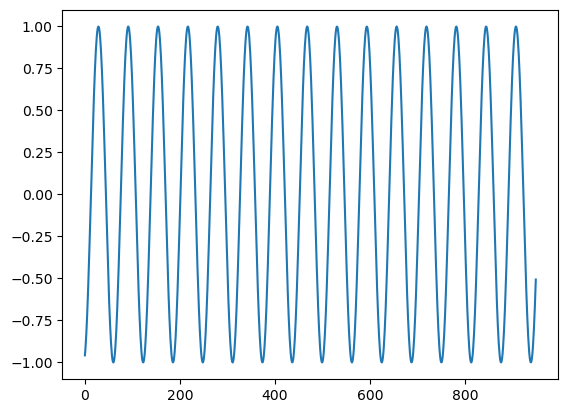

In [16]:
x = [x for y, x in dataloader]
plt.plot(x)

## Setting up Network

In [19]:
class Net(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()
        
        self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons, batch_first=True)

        self.fc = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        _, (h_n1, _) = self.lstm(x)
        out = self.fc(h_n1)
        return out

In [21]:
n_neurons = 12
epochs = 4

model = Net(n_neurons, included_timesteps)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_curve = []

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

for epoch in range(epochs):
    loss_total = 0
    model.train()

    for x, y in dataloader:
        optimizer.zero_grad()

        predictions = model(x.float())
        loss = loss_function(predictions, y.float())
        loss_total += loss.item()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch}: {loss_total=}')

C:\Users\Max Tost\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: loss_total=32.35261641794523
Epoch 1: loss_total=10.51988490836338
Epoch 2: loss_total=3.36973941691235
Epoch 3: loss_total=3.679870691005849


In [13]:
for x, y in dataloader:
    print(x.shape, y.shape)
    break

torch.Size([1, 20]) torch.Size([1])


In [22]:
# Predicting stuff
for x, y in dataloader:
    x1 = x
    break